# **PERKENALAN**

Nama : Sutisna

Grade Challenge 2 : Linear Algebra dan Calculus

Pada Grade Challenge ini, akan dilakukan image processing menggunakan konsep linear algebra dan calculus.

Dataset yang digunakan adalah sebagai berikut:

https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

# **IMPORT PUSTAKA**

In [102]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import filters

# **DATA LOADING**

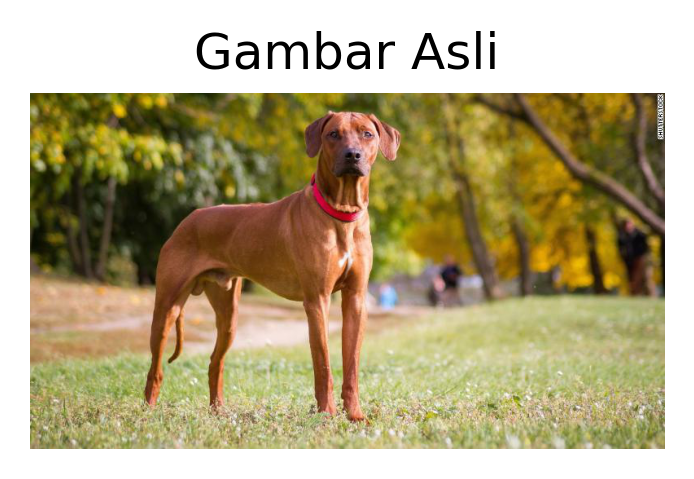

In [103]:
gambar = Image.open('dog.jpg')
fig = plt.figure(dpi = 300)

ax = fig.add_subplot(221)
ax.set_title('Gambar Asli')
ax.axis('off')
ax.imshow(gambar)

# **DATA TRANSFORMATION**

Konversi gambar asli menjadi warna abu-abu dan mentranformasikan menjadi array

In [104]:
gambar_abu2 = np.array(Image.open('dog.jpg').convert('L'))
gambar_abu2

array([[ 85,  85,  83, ...,  40,  38,  51],
       [ 76,  76,  75, ...,  38,  56,  29],
       [ 64,  65,  65, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 136, 135, 131],
       [149, 142, 132, ..., 141, 139, 134],
       [149, 142, 131, ..., 146, 143, 136]], dtype=uint8)

In [105]:
gambar_abu2.shape

(438, 780)

# **IMAGE DATA EXPLORATION**

Membuat 2 Matrix yang berukuran sama imx dan imy dari ukuran gambar asli (abu - abu)

In [106]:
imx = np.zeros(gambar_abu2.shape)
imy = np.zeros(gambar_abu2.shape)

Matrik nol untuk sumbu x

In [107]:
imx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Matrix nol untuk sumbu ya

In [108]:
imy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **LINEAR ALGEBRA IMPLEMENTATION**

saya akan melakukan tranformasi linear pada gambar, akan dibuat matrix diagonal 1 dengan ukuran yang sama dengan gambar.

In [109]:
flip_matrix = []
col = gambar_abu2.shape[0] - 1
for i in range(gambar_abu2.shape[0]):
    flip_matrix.append([])
    for j in range(gambar_abu2.shape[0]):
        if j != col:
            flip_matrix[i].append(0)
        else:
            flip_matrix[i].append(1)
    col -= 1
flip_matrix = np.array(flip_matrix)
flip_matrix, flip_matrix.shape

(array([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]]),
 (438, 438))

Menampilkan gambar hasil tranformasi

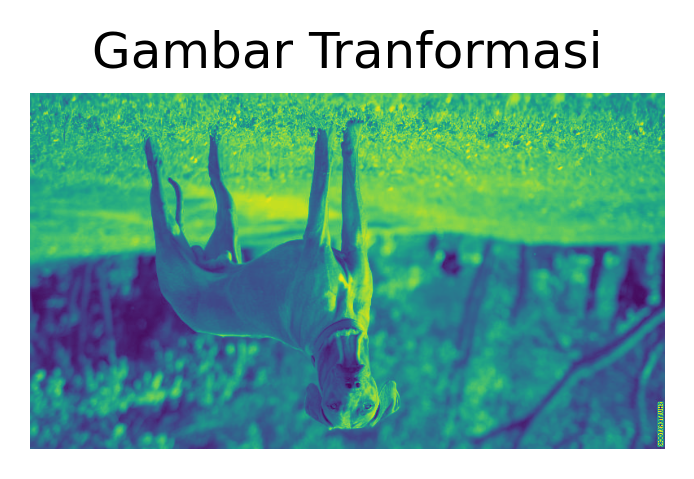

In [110]:
fig = plt.figure(dpi = 300)
ax4 = fig.add_subplot(224)
ax4.set_title('Gambar Tranformasi')
ax4.axis('off')
ax4.imshow(flip_matrix.dot(gambar_abu2))

Memanggil sobel operator dari library scipy untuk menghitung vektor gradient (turunan parsial) masing masing pixel untuk tiap sumbu x dan ya

In [111]:
filters.sobel(gambar_abu2,1,imx,cval=0.0)  # axis 1 adalah x
filters.sobel(gambar_abu2,0,imy, cval=0.0) # axis 0 adalah y

array([[-36., -35., -31., ...,  17.,  12., -48.],
       [-83., -79., -70., ...,  15.,  13.,  25.],
       [-72., -70., -63., ..., 611., 199.,  92.],
       ...,
       [ -7., -14., -17., ...,  14.,  12.,   9.],
       [ -5.,  -8.,  -9., ...,  39.,  31.,  23.],
       [  0.,  -1.,  -3., ...,  20.,  15.,  10.]])

# **CALCULUS IMPLEMENTATION**

Hitung gradient magnitude

In [112]:
magnitude = np.sqrt(imx**2+imy**2)
magnitude

array([[ 36.        ,  35.6931366 ,  35.35533906, ...,  17.2626765 ,
         26.83281573,  49.47726751],
       [ 83.00602388,  79.0569415 ,  70.45565982, ...,  21.21320344,
         13.92838828,  30.23243292],
       [ 72.02777242,  70.0285656 ,  63.07138812, ..., 651.1113576 ,
        261.07853225, 110.94142599],
       ...,
       [ 24.04163056,  63.56099433,  74.95331881, ...,  15.23154621,
         25.05992817,  19.23538406],
       [ 27.45906044,  68.46897107,  71.56814934, ...,  39.11521443,
         42.44997055,  31.144823  ],
       [ 28.        ,  71.0070419 ,  71.06335202, ...,  20.09975124,
         39.92492956,  27.85677655]])

# **OVERALL ANALYSIS**

Saya akan membandingkan antara nilai magnitude dengan nilai threshold

**1. untuk nilai threshold ~ 50**

In [113]:
magnitude *= 255.0/np.max(magnitude)
mag = magnitude.astype("uint8")
final_mag_50 = np.zeros(mag.shape,dtype="uint8")
for i in range(mag.shape[0]):
    for j in range(mag.shape[1]):
         if mag[i,j] < 50:
             final_mag_50[i,j] = 0
         else:
             final_mag_50[i,j] = 255

Kita akan melihat hasil edge detection untuk threshold ~ 50

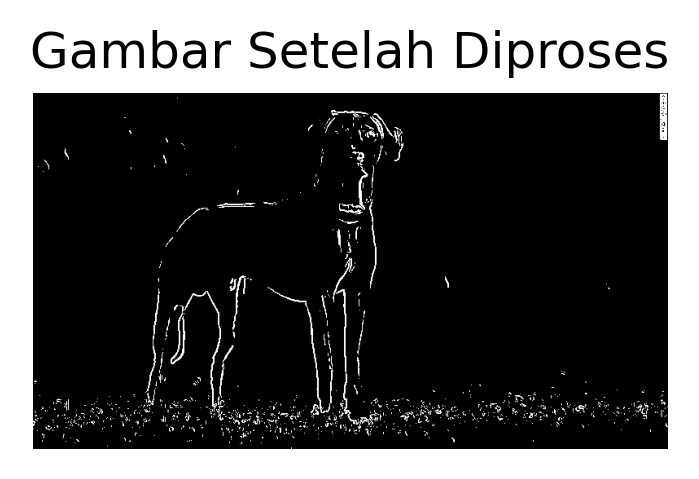

In [114]:
fig = plt.figure(dpi = 300)
ax1 = fig.add_subplot(222)
ax1.set_title('Gambar Setelah Diproses')
ax1.axis('off')
ax1.imshow(final_mag_50, cmap='gray')

**2. untuk nilai threshold ~ 30**

In [115]:
final_mag_30 = np.zeros(mag.shape,dtype="uint8")
for i in range(mag.shape[0]):
    for j in range(mag.shape[1]):
         if mag[i,j] < 30:
             final_mag_30[i,j] = 0
         else:
             final_mag_30[i,j] = 255

visualisasi untuk threshold ~ 30

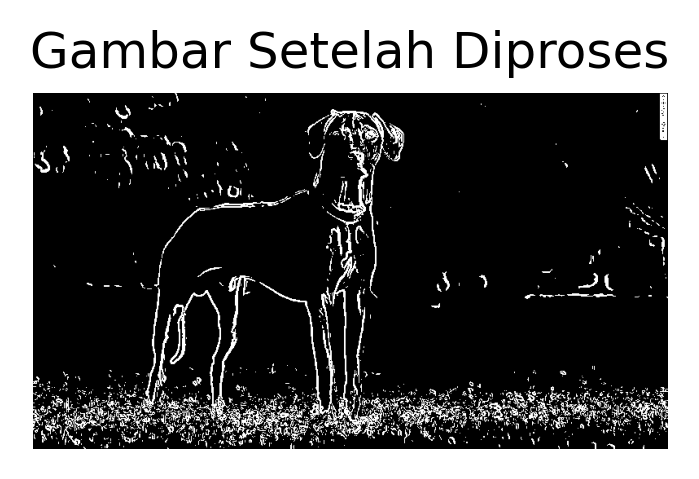

In [116]:
fig = plt.figure(dpi = 300)
ax2 = fig.add_subplot(223)
ax2.set_title('Gambar Setelah Diproses')
ax2.axis('off')
ax2.imshow(final_mag_30, cmap='gray')

**2. untuk nilai threshold ~ 70**

In [117]:
final_mag_70 = np.zeros(mag.shape,dtype="uint8")
for i in range(mag.shape[0]):
    for j in range(mag.shape[1]):
         if mag[i,j] < 70:
             final_mag_70[i,j] = 0
         else:
             final_mag_70[i,j] = 255

visualisasi untuk threshold ~ 70

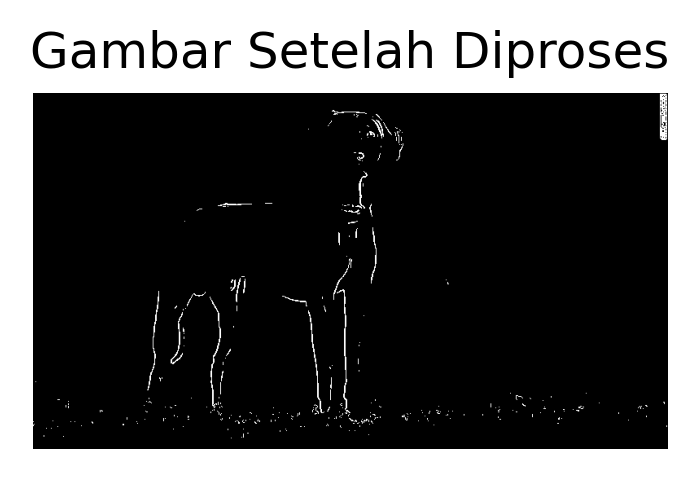

In [118]:
fig = plt.figure(dpi = 300)
ax3 = fig.add_subplot(224)
ax3.set_title('Gambar Setelah Diproses')
ax3.axis('off')
ax3.imshow(final_mag_70, cmap='gray')

# **KESIMPULAN**

Dapat disimpulkan dari percobaan diatas bahwa edge detection dapat dilakukan dengan metode sobel, dan untuk edge detection terlihat paling jelas adalah di nilai magnitude ~ 30.